In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from phonon_functions import gauss, phononI_offset, errorfunc, one_phonon_at_energy

%matplotlib line

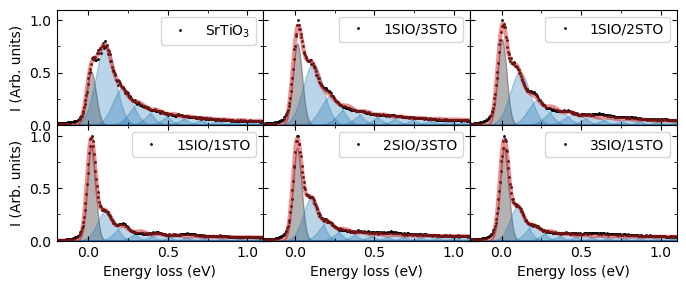

In [3]:
stems = ['STO_sub',
         'SL_STSIO_02_13_(1_3)',
         'SL_STSIO_02_11_(1_2)',
         'SL_STSIO_02_15_(1_1)',
         'SL_STSIO_02_12_(2_1)',
         'SL_STSIO_02_11_(3_1)',
         ]

labels = ['SrTiO$_3$',
          '1SIO/3STO',
          '1SIO/2STO',
          '1SIO/1STO',
          '2SIO/3STO',
          '3SIO/1STO',
         ]


fig, axs = plt.subplots(2, 3, figsize=(8, 3))

Bgd = 0.0
gam = 0.22
method = 'Adj_BGD'
FWHM2sig = 2*np.sqrt(2*np.log(2))
x_fit = np.arange(-0.3, 2, 0.005)

for ax, stem, label in zip(axs.ravel(), stems, labels):
    
    # Fit
    p, e = np.loadtxt('./FitParameters/{}_{}_{}.txt'.format(stem, method, gam))
    el = gauss(x_fit, p[0], p[1], p[2])
    Am = phononI_offset(x_fit, p[3], p[4], p[5], p[6], p[7], 15, p[9], p[10], p[11])
    Er = errorfunc(x_fit, p[12], p[13], p[14], p[15])        
    tot = el + Am + Er
    
    # Data
    x, y = np.loadtxt(f'SummedData/{stem}_SAC.txt')
    y = y/np.max(y[x < 1])
    
    if stem == 'STO_sub':
        y = y*0.8
        tot = tot*0.8
    
    ax.plot(x, y, '.', markersize=2, color='k', label=label)
    ax.plot(x_fit, tot, color='tab:red', alpha=.5, linewidth=3)
    
    ax.fill_between(x_fit, el, color='black', alpha=0.3)
    
    for phonon_ind in range(1, 15):
        yph = one_phonon_at_energy(x_fit, tot, p[5]*phonon_ind, p[10])
        ax.fill_between(x_fit, yph, color='tab:blue', alpha=0.3)
    
    ax.axis([-0.2, 1.1, 0, 1.1])
    ax.legend()
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

fig.subplots_adjust(hspace=0, wspace=0)

for ax in axs[0, :]:
    ax.set_xticklabels([])

for ax in axs[:, 1:].ravel():
    ax.set_yticklabels([])

for ax in axs[1, :]:
    ax.set_xlabel('Energy loss (eV)')
    
for ax in axs[:, 0]:
    ax.set_ylabel('I (Arb. units)')